# Regresión Logística Over Sample

Over-sample la clase menos representada a través de una replicación aleatoria de los ejemplos menos representados para balancear el dataset

## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import  GridSearchCV
from scikitplot.metrics import plot_roc,plot_ks_statistic
from imblearn.over_sampling import RandomOverSampler

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Entrenamiento del modelo

### Lectura de datos

In [2]:
train=pd.read_csv('~/train_discretizado.csv')
train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

### Mejores variables

In [3]:
best=['woe_disc_tot_cur_bal_10', 'woe_disc_int_rate_10', 'woe_disc_inq_last_6mths_10', 'woe_disc_annual_inc_10', 
      'woe_disc_dti_9', 'woe_disc_mths_between_issued_earliest_cr_10', 'woe_disc_total_rev_hi_lim_10']

target='target'

### Over Sample

In [4]:
ros=RandomOverSampler(sampling_strategy='minority',random_state=1)
X,y=ros.fit_resample(train[best],train[target])

In [5]:
# oversampling la clase minoritaria (target=1)
y.value_counts(1)

0    0.5
1    0.5
Name: target, dtype: float64

### Entrenamiento

In [6]:
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

### Desempeño del modelo en el conjunto de entrenamiento

In [7]:
# porcentaje de aciertos
accuracy_score(y,logreg.predict(X))

0.6309606117205155

In [8]:
# area bajo la curva ROC
roc_auc_score(y,logreg.predict_proba(X)[:,1])

0.6783254081446324

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

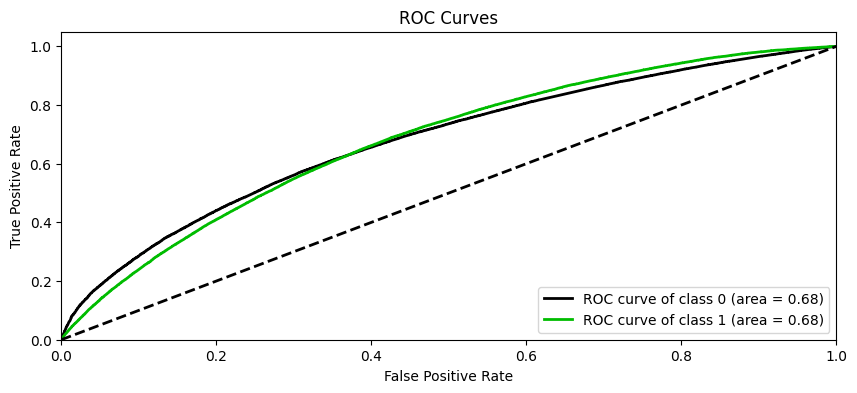

In [9]:
plot_roc(y,logreg.predict_proba(X),plot_micro=False,plot_macro=False,figsize=(10,4))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

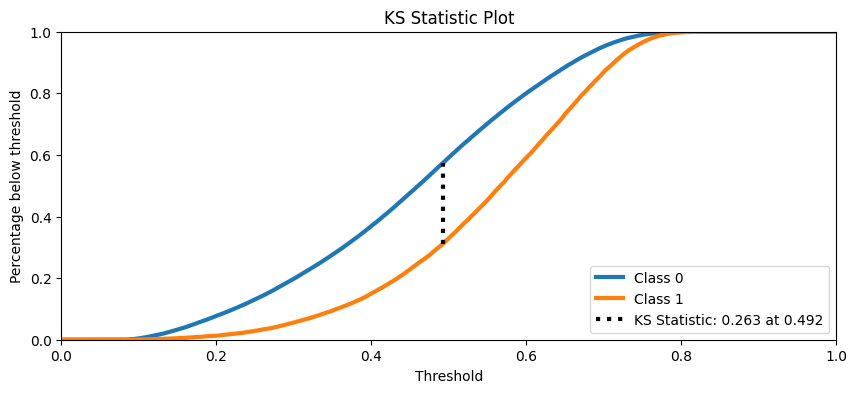

In [10]:
plot_ks_statistic(y,logreg.predict_proba(X),figsize=(10,4))

## Hiperparámetros

In [11]:
param_grid={'penalty':['l1', 'l2', None],
            'C':[.001,0.01,0.1,1,10],
            'class_weight':['balanced',None]
            }

In [12]:
gscv=GridSearchCV(logreg,param_grid,scoring='roc_auc',cv=5)
gscv.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', None]},
             scoring='roc_auc')

In [13]:
# mejores parametros
gscv.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [14]:
modelo=gscv.best_estimator_
modelo.fit(X,y)

LogisticRegression(C=0.01, class_weight='balanced')

In [15]:
roc_auc_score(y,modelo.predict_proba(X)[:,1])

0.6783296389006743

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

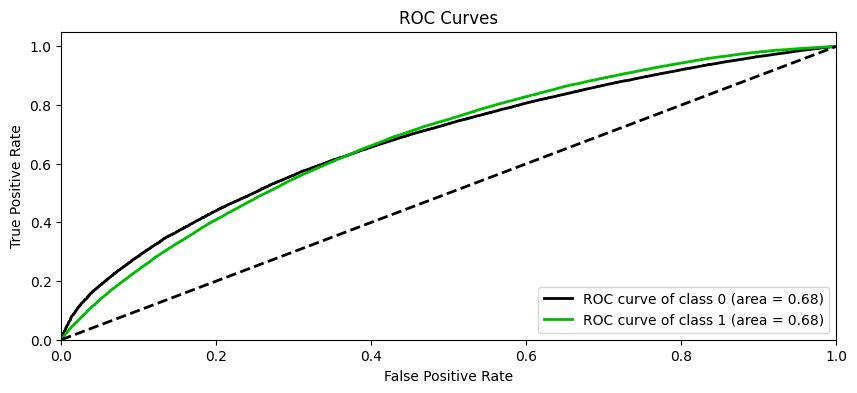

In [16]:
plot_roc(y,modelo.predict_proba(X),plot_micro=False,plot_macro=False,figsize=(10,4))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

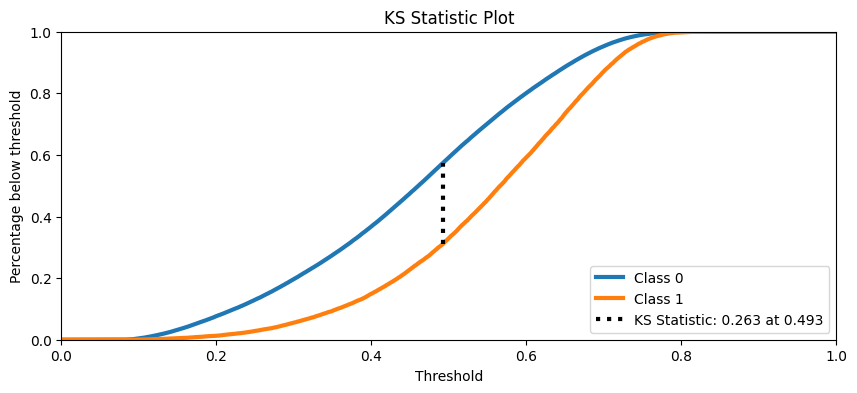

In [17]:
plot_ks_statistic(y,modelo.predict_proba(X),figsize=(10,4))

## Desempeño del modelo en el conjunto de prueba

### Lectura de datos de prueba

In [18]:
test=pd.read_csv('~/test_discretizado.csv')
test.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

### Accuracy score

In [19]:
accuracy_score(test[target],modelo.predict(test[best]))

0.6007391733268519

### Curva ROC

In [20]:
roc_auc_score(test[target],modelo.predict_proba(test[best])[:,1])

0.6837931574836792

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

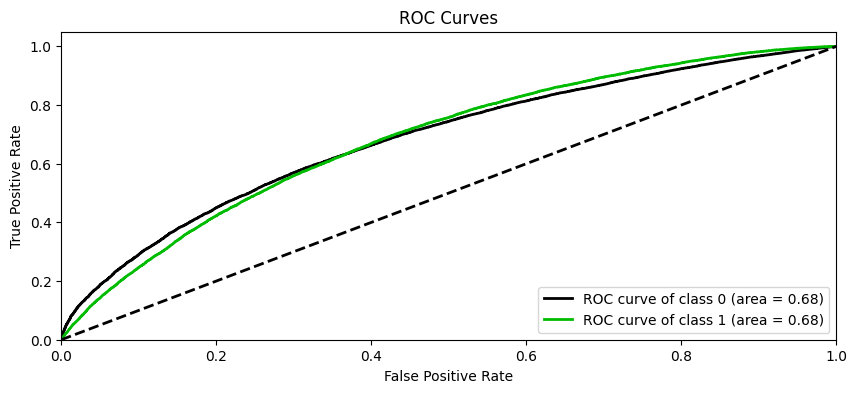

In [21]:
plot_roc(test[target],modelo.predict_proba(test[best]),plot_micro=False,plot_macro=False,figsize=(10,4))

### K-S

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

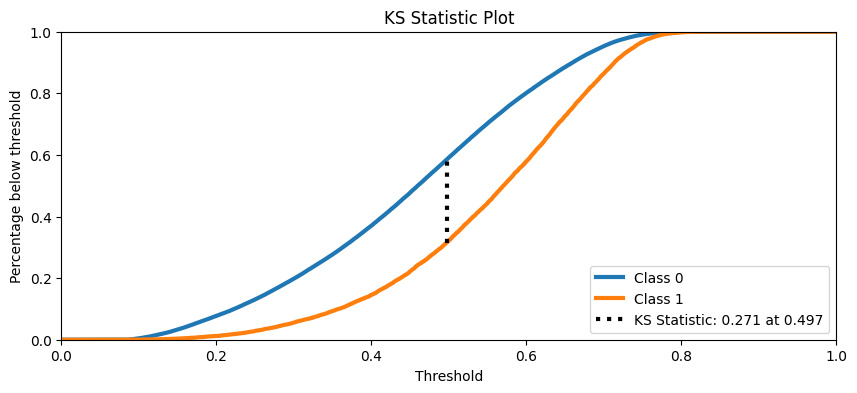

In [22]:
plot_ks_statistic(test[target],modelo.predict_proba(test[best]),figsize=(10,4))

## Parámetros del modelo

In [23]:
# intercepto
modelo.intercept_

array([-0.00358673])

In [24]:
# coeficientes
modelo.coef_

array([[-0.67289721, -0.93136271, -0.54465118, -0.47222492, -0.62624735,
        -0.30899513, -0.4388085 ]])